In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

### CO2 Flux against DIC - Baseline

In [5]:
dic_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
co2flux_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_Baseline_2.6_cropped.nc')

In [7]:
co2flux_baseline = co2flux_baseline.co2flux * 31536000
co2flux_baseline = co2flux_baseline / 0.04401 # mol/m2/yr CO2

In [8]:
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [9]:
dic_baseline = dic_baseline.where(dic_baseline)

In [10]:
co2flux_baseline = co2flux_baseline.co2flux[0,:]
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [11]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux.mean(dim=('y', 'x'))

In [12]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_baseline = dic_baseline.sel(time_counter=slice(start_date, end_date))
dic_frame_baseline = dic_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))

In [13]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux')
dic_frame_baseline = dic_frame_baseline.to_dataframe('DIC')

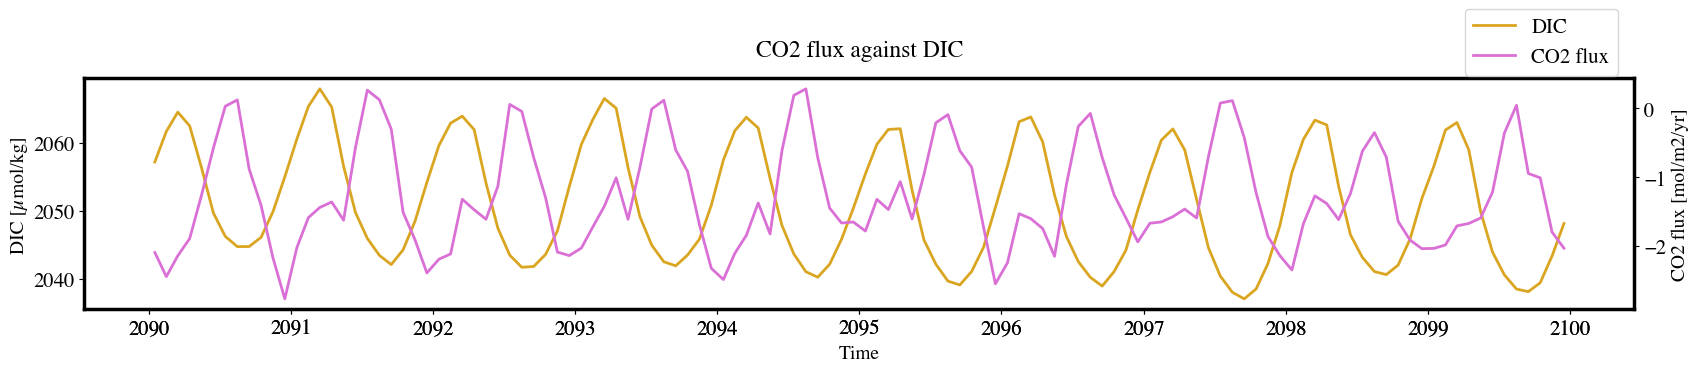

In [14]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dic_frame_baseline.index, dic_frame_baseline.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)

ax2.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 flux against DIC', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### CO2 Flux against DIC - Baseline (annual average)

In [15]:
mean_dic_baseline = dic_frame_baseline.groupby(dic_frame_baseline.index.month).DIC.mean()
mean_dic_baseline = mean_dic_baseline.reset_index()
mean_dic_baseline['time_counter'] = mean_dic_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_baseline = mean_dic_baseline.set_index('time_counter')

In [16]:
mean_co2flux_baseline = co2flux_frame_baseline.groupby(co2flux_frame_baseline.index.month).co2flux.mean()
mean_co2flux_baseline = mean_co2flux_baseline.reset_index()
mean_co2flux_baseline['time_counter']= mean_co2flux_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_baseline = mean_co2flux_baseline.set_index('time_counter')

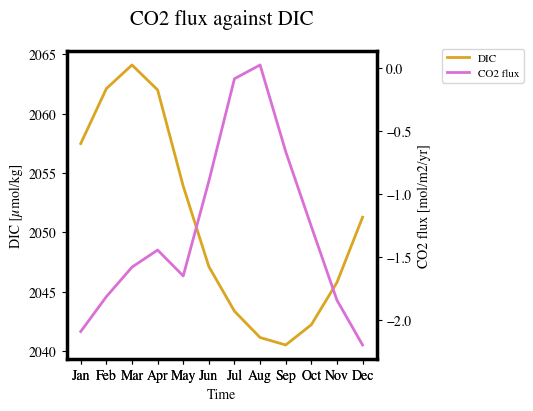

In [17]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_dic_baseline.index, mean_dic_baseline.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC [µmol/kg]', fontsize=10)

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('CO2 flux against DIC', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)
plt.show()

### CO2 Flux against DIC - OAE

In [18]:
dic_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [19]:
co2flux_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_OAE_2.6_cropped.nc')

In [20]:
co2flux_oae = co2flux_oae.co2flux * 31536000
co2flux_oae = co2flux_oae / 0.04401 # mol/m2/yr CO2

In [21]:
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [22]:
dic_oae = dic_oae.where(dic_oae)

In [23]:
co2flux_oae = co2flux_oae.co2flux[0,:]
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [24]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux.mean(dim=('y', 'x'))

In [25]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_oae = dic_oae.sel(time_counter=slice(start_date, end_date))
dic_frame_oae = dic_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [26]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux')
dic_frame_oae = dic_frame_oae.to_dataframe('DIC')

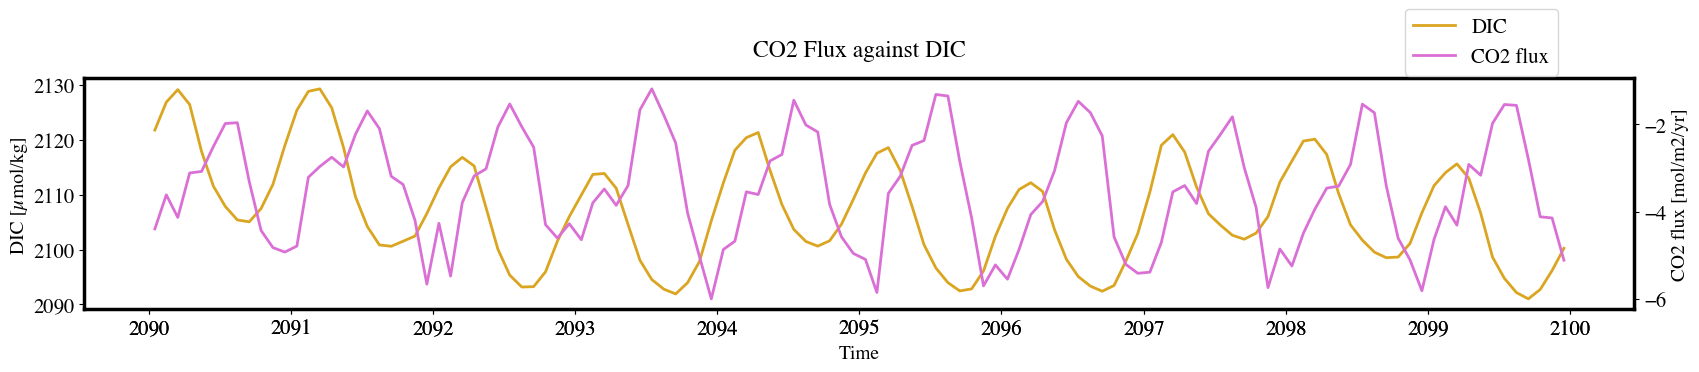

In [27]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dic_frame_oae.index, dic_frame_oae.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against DIC', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against DIC - OAE (annual average)

In [28]:
mean_dic_oae = dic_frame_oae.groupby(dic_frame_oae.index.month).DIC.mean()
mean_dic_oae = mean_dic_oae.reset_index()
mean_dic_oae['time_counter'] = mean_dic_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_oae = mean_dic_oae.set_index('time_counter')

In [29]:
mean_co2flux_oae = co2flux_frame_oae.groupby(co2flux_frame_oae.index.month).co2flux.mean()
mean_co2flux_oae = mean_co2flux_oae.reset_index()
mean_co2flux_oae['time_counter']= mean_co2flux_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_oae = mean_co2flux_oae.set_index('time_counter')

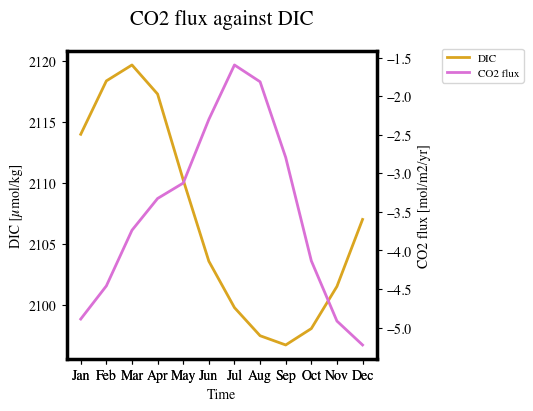

In [30]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_dic_oae.index, mean_dic_oae.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax.set_ylabel('DIC [µmol/kg]', fontsize=10)

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('CO2 flux against DIC', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)
plt.show()

### CO2 Flux against ƒCO2 - Baseline

In [31]:
fco2_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_baseline_2.6_cropped.nc')

In [32]:
fco2_baseline = fco2_baseline.fco2[0,:]
fco2_baseline = fco2_baseline.to_dataset(name='fco2')

In [33]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_baseline = fco2_baseline.sel(time_counter=slice(start_date, end_date))
fco2_frame_baseline = fco2_frame_baseline.fco2.mean(dim=('y', 'x'))

In [34]:
fco2_frame_baseline = fco2_frame_baseline.to_dataframe('fco2')

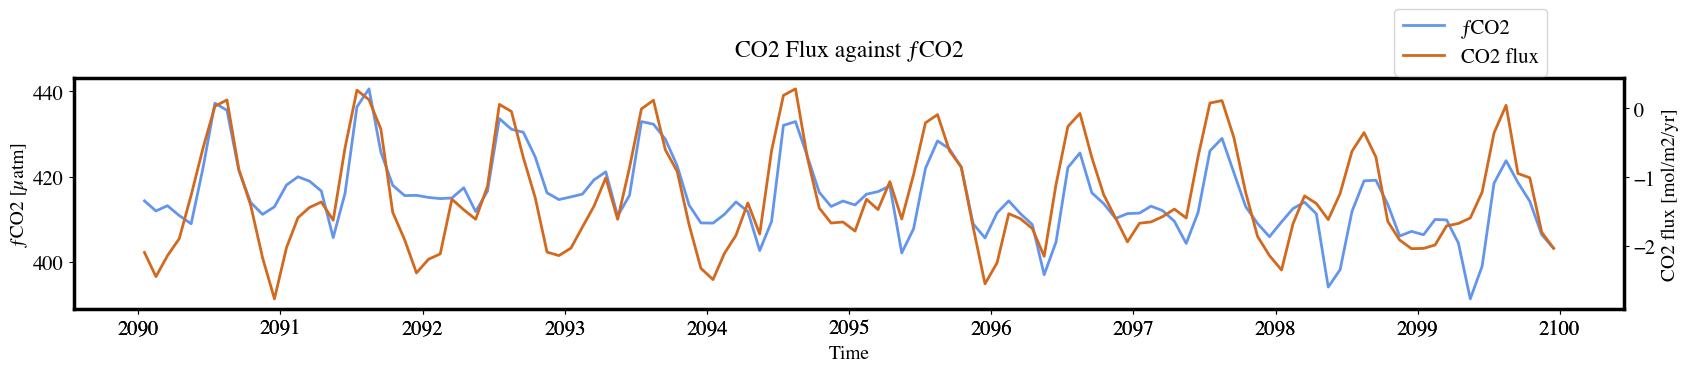

In [66]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_baseline.index, fco2_frame_baseline.fco2, linewidth=2, color="cornflowerblue", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=14)

ax2.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux, linewidth=2, color="chocolate", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against ƒCO2', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against ƒCO2 - Baseline (annual average)

In [36]:
mean_fco2_baseline = fco2_frame_baseline.groupby(fco2_frame_baseline.index.month).fco2.mean()
mean_fco2_baseline = mean_fco2_baseline.reset_index()
mean_fco2_baseline['time_counter']= mean_fco2_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_baseline = mean_fco2_baseline.set_index('time_counter')

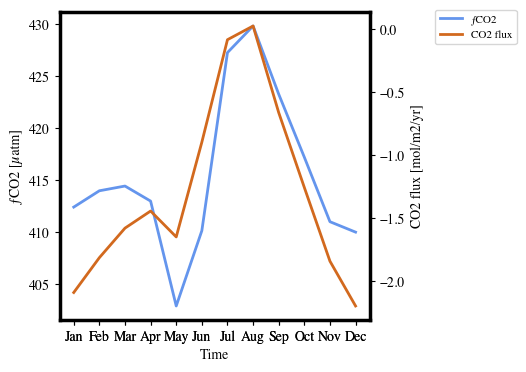

In [71]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=2, color="cornflowerblue", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=2, color="chocolate", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

#plt.title('CO2 flux against ƒCO2', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)

pass

### CO2 Flux against ƒCO2 - OAE

In [38]:
fco2_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_OAE_2.6_cropped.nc')

In [39]:
fco2_oae = fco2_oae.fco2[0,:]
fco2_oae = fco2_oae.to_dataset(name='fco2')

In [40]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_oae = fco2_oae.sel(time_counter=slice(start_date, end_date))
fco2_frame_oae = fco2_frame_oae.fco2.mean(dim=('y', 'x'))

In [41]:
fco2_frame_oae = fco2_frame_oae.to_dataframe('fco2')

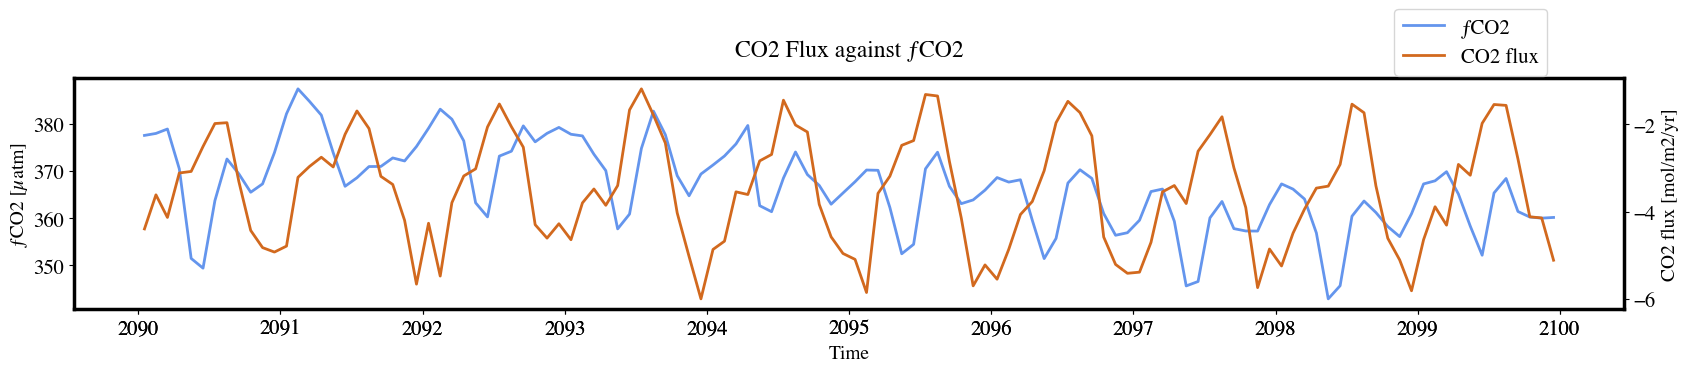

In [67]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_oae.index, fco2_frame_oae.fco2, linewidth=2, color="cornflowerblue", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux, linewidth=2, color="chocolate", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against ƒCO2', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against ƒCO2 - OAE (annual average)

In [43]:
mean_fco2_oae = fco2_frame_oae.groupby(fco2_frame_oae.index.month).fco2.mean()
mean_fco2_oae = mean_fco2_oae.reset_index()
mean_fco2_oae['time_counter']= mean_fco2_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_oae = mean_fco2_oae.set_index('time_counter')

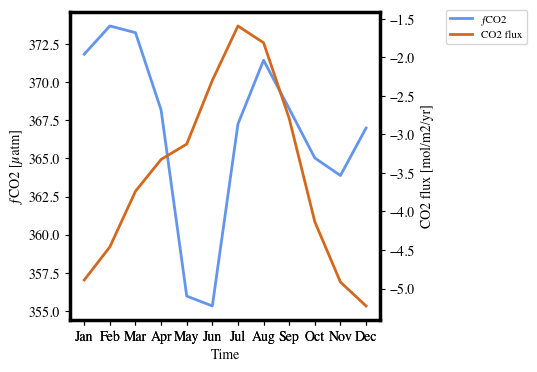

In [72]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=2, color="cornflowerblue", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=2, color="chocolate", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

#plt.title('CO2 flux against ƒCO2', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)

pass

### CO2 Flux against Alkalinity - Baseline

In [45]:
alk_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [46]:
alk_baseline = alk_baseline.where(alk_baseline)

In [47]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_baseline = alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [48]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')

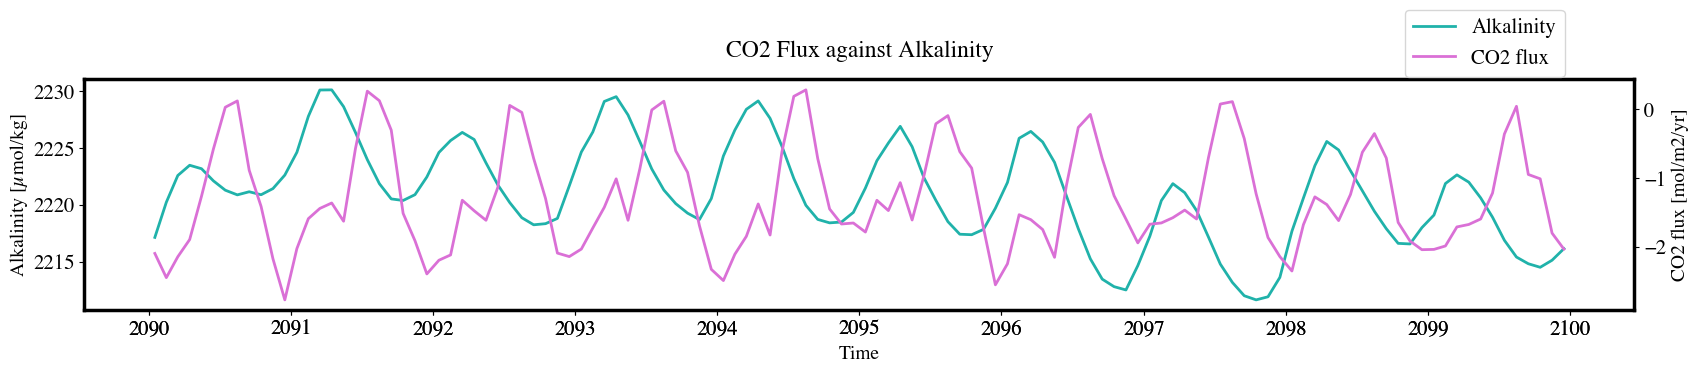

In [49]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_baseline.index, alk_frame_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against Alkalinity - Baseline (annual average)

In [50]:
mean_alk_baseline = alk_frame_baseline.groupby(alk_frame_baseline.index.month).ALK.mean()
mean_alk_baseline = mean_alk_baseline.reset_index()
mean_alk_baseline['time_counter'] = mean_alk_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_baseline = mean_alk_baseline.set_index('time_counter')

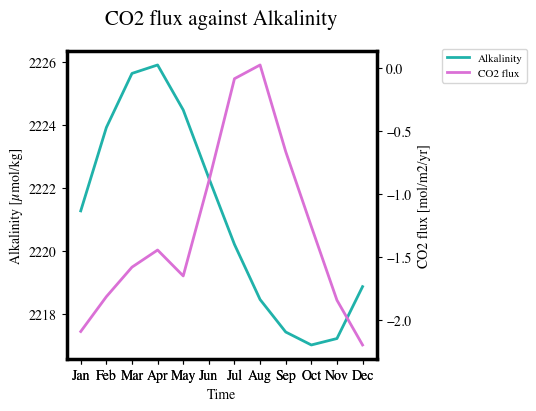

In [51]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('CO2 flux against Alkalinity', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)
plt.show()

### CO2 Flux against Alkalinity - OAE

In [52]:
alk_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [53]:
alk_oae = alk_oae.where(alk_oae)

In [54]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_oae = alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [55]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')

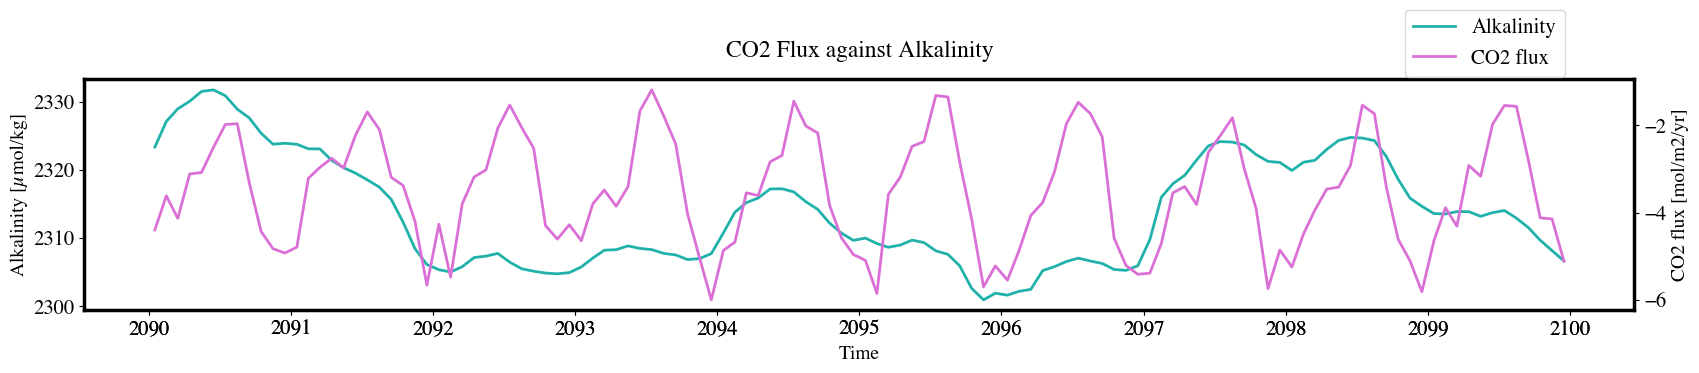

In [56]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 Flux against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()

### CO2 Flux against Alkalinity - OAE (annual average)

In [57]:
mean_alk_oae = alk_frame_oae.groupby(alk_frame_oae.index.month).ALK.mean()
mean_alk_oae = mean_alk_oae.reset_index()
mean_alk_oae['time_counter'] = mean_alk_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_oae = mean_alk_oae.set_index('time_counter')

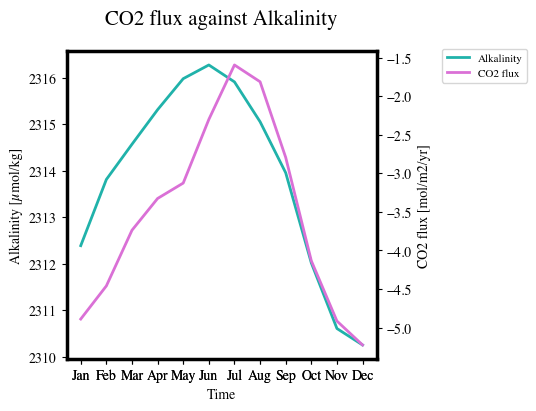

In [58]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('CO2 flux against Alkalinity', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)
plt.show()